In [584]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d

In [614]:
n_samples = 100
n_centers = 3
k = 3

(2, 100)

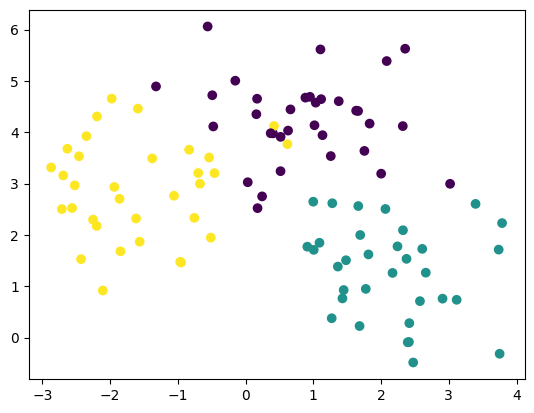

In [615]:
X, y = make_blobs(n_samples=n_samples, centers=n_centers, cluster_std=0.90, random_state=0)
X = X.T

X.shape
_ = plt.scatter(*X, c=y)

#### initial cluster assignment

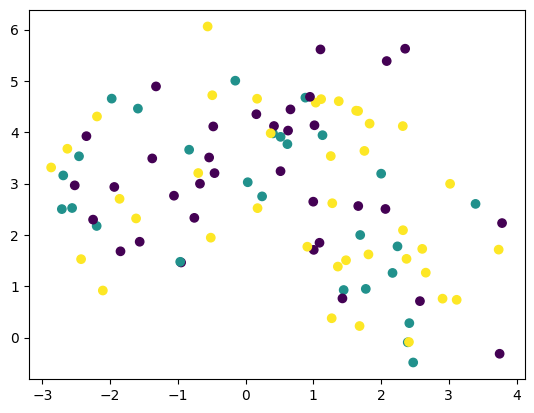

In [616]:
cluster_assignments = np.random.randint(k, size=n_samples)
_ = plt.scatter(*X, c=cluster_assignments)

#### calculating cluster centers

In [617]:
centers = np.zeros((2, k))

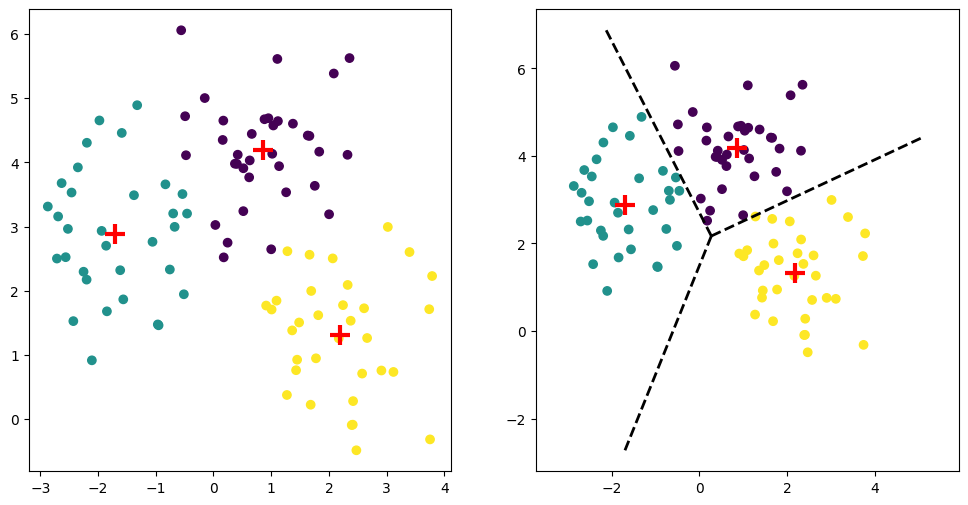

In [637]:
for k_ in range(k):
  sample_indices = np.where(cluster_assignments == k_)[0]
  if len(sample_indices) == 0:
    continue  # skip if no samples in this cluster
  samples = X[:, sample_indices]
  center = samples.mean(axis=1)
  centers[:, k_] = center

_ = plt.figure(figsize=(12, 6))
_ = plt.subplot(1, 2, 1)
_ = plt.scatter(*X, c=cluster_assignments)
_ = plt.scatter(*centers, c='r', marker='+', s=200, linewidths=3)

_ = plt.subplot(1, 2, 2)
_ = plt.scatter(*X, c=cluster_assignments)
_ = voronoi_plot_2d(Voronoi(centers.T), ax=plt.gca(), show_vertices=False, show_points=False, line_width=2)
_ = plt.scatter(*centers, c='r', marker='+', s=200, linewidths=3)
_ = plt.axis('equal')

#### reassigning closest cluster to samples

In [636]:
reassigned = False

for i in range(n_samples):
  sample = X[:, i].reshape(-1, 1)
  old_cluster = cluster_assignments[i]
  new_cluster = np.argmin(np.linalg.norm(centers - sample, axis=0))
  if old_cluster != new_cluster:
    cluster_assignments[i] = new_cluster
    reassigned = True

reassigned

False